#### Arunjith PM - DSML september Batch

# Business Case: Yulu - Hypothesis Testing

### About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!



### Business Problem
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Data set**
- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not 
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
    - 1: Clear, Few clouds, partly cloudy, partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

## Problem statement
- Study the data set for data cleaning and preprocessing
- Detect outliers in the data set using describe function and boxplot
- Understand the distribution of data for the quantitative attributes
- Understand correlations of data among the quantitative attributes
- No of holidays without saturdays and sundays
- No of holidays and working days
- Dependance of weather on totel user count
- Dependance of season on total user count
- Dependance of temp on total user count
- Dependance of atemp on total user count
- Dependance of humidity on total user count
- Dependance of windspeed on total user count
- No of user counts in holidays without saturdays and sundays
- No of user counts in holidays and working days
- No of user count in each weekdays
- No of user count in each month
- Most demand time for rending bike
- No.of users across weather in working days
- No.of users across every season in working days
- No.of users across every season in diffrent year
- No.of users across every season in casual and registered users
- Temprature varies across diffrent month in each season
- No.of users varies across diffrent month in each season
- Usage of bikes in each season at diffrent times
- Chi-square test to check if Weather is dependent on the season
- Chi-square test to check if Weather is workingday on the season
- ANNOVA to check if No. of cycles rented is similar or different in different  season 
- ANNOVA to check if No. of cycles rented is similar or different in different  weather

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('bike_sharing.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [2]:
#length of data
len(data)

NameError: name 'data' is not defined

In [4]:
# columns name
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
#checking datatypes
data.dtypes
#object => typically categorical/IDs
#Int64, Float64

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [86]:
data['datetime']=pd.to_datetime(data['datetime'])

In [7]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

## Basic Data Exploration

In [8]:
data.describe()
# only numeric features

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
#missing values
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
#number of unique values in our numerical data
for i in data.columns:
  print(i,':',data[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [11]:
#Unique values in our numerical data
for i in data.columns:
  print(i,':',data[i].unique())

datetime : ['2011-01-01T00:00:00.000000000' '2011-01-01T01:00:00.000000000'
 '2011-01-01T02:00:00.000000000' ... '2012-12-19T21:00:00.000000000'
 '2012-12-19T22:00:00.000000000' '2012-12-19T23:00:00.000000000']
season : [1 2 3 4]
holiday : [0 1]
workingday : [0 1]
weather : [1 2 3 4]
temp : [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
atemp : [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.2

### value counts

In [12]:
for i in data.columns:
  print(i,':',data[i].value_counts())

datetime : 2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64
season : 4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
holiday : 0    10575
1      311
Name: holiday, dtype: int64
workingday : 1    7412
0    3474
Name: workingday, dtype: int64
weather : 1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
temp : 14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68   

In [13]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## Find outliers in the numerical variables

In [150]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- > we can see that features casual,registered and count have diffrent mean and median , so we need to find outlayer of these features

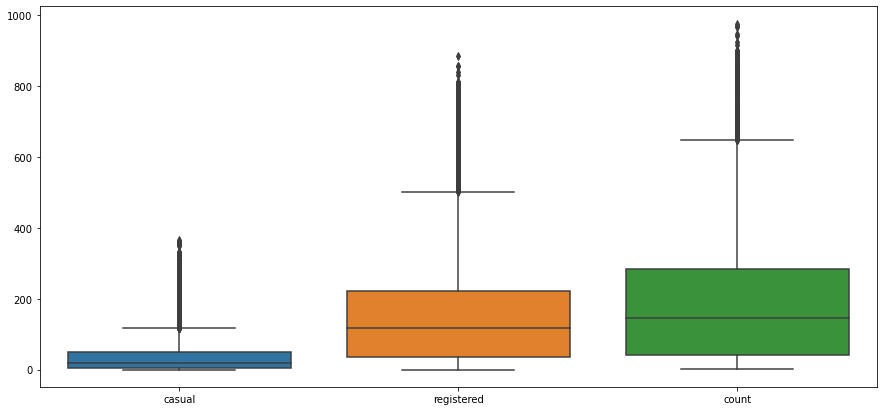

In [153]:
plt.figure(figsize=(15,7))
attrs=['casual','registered','count']
sns.boxplot(data=data[['casual','registered','count']])
plt.show()


In [154]:
da=data.copy()
attrs=['casual','registered','count']
for i in attrs:
    q1=data[i].quantile(.25)
    q3=data[i].quantile(.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print('lower limit of',i,'=',lower)
    print('upper limit of',i,'=',upper)
    print('----------------------------------------------------------------')
    da=da[~((da[i]<lower)|(da[i]>upper))]
da

lower limit of casual = -63.5
upper limit of casual = 116.5
----------------------------------------------------------------
lower limit of registered = -243.0
upper limit of registered = 501.0
----------------------------------------------------------------
lower limit of count = -321.0
upper limit of count = 647.0
----------------------------------------------------------------


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### By removing outlayers we can see that 9744 rows insted of 10886

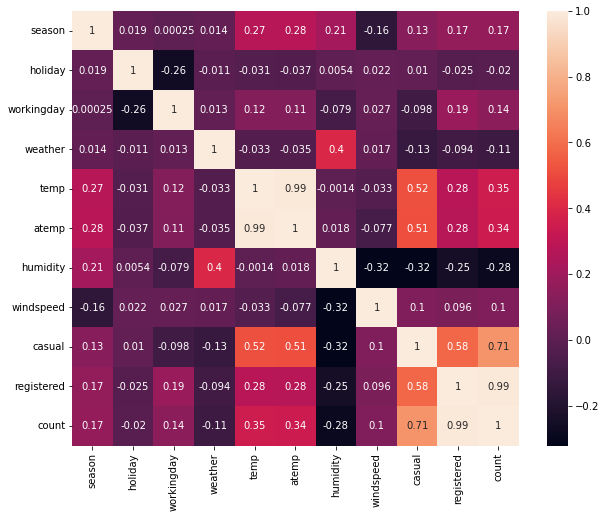

In [155]:
plt.figure(figsize=(10,8))
sns.heatmap(da.corr(), annot=True)
plt.show()

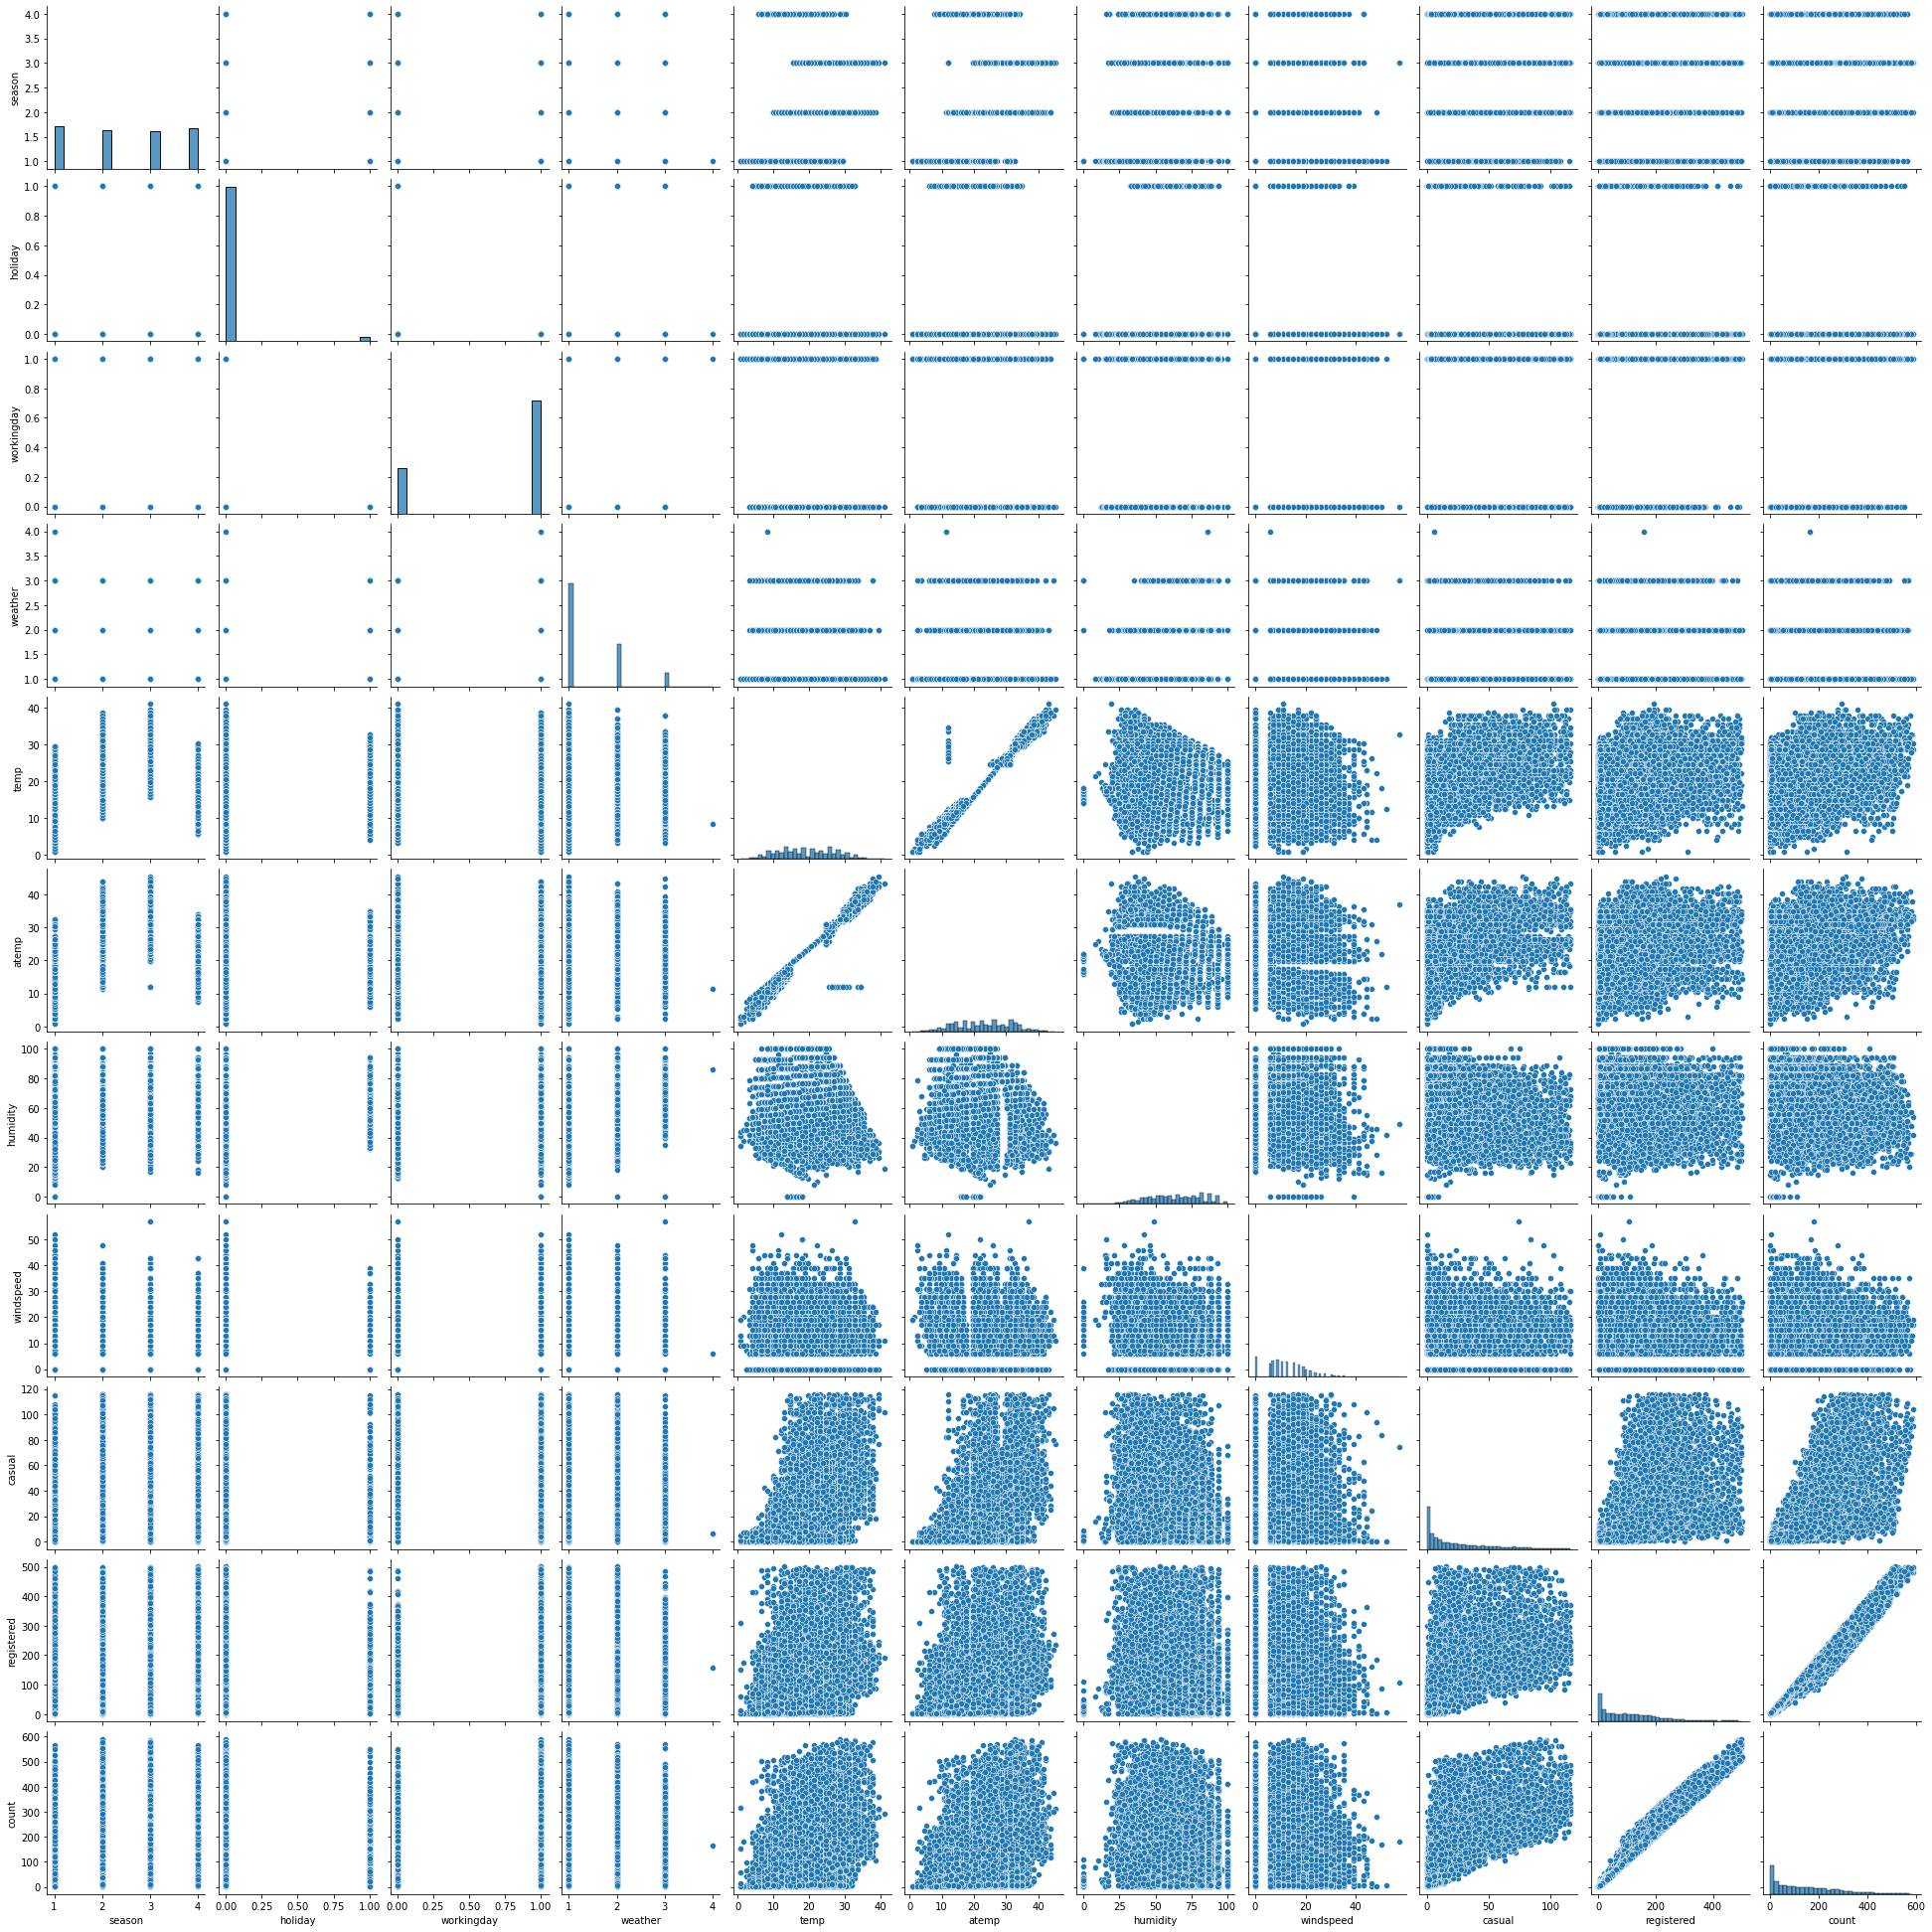

In [156]:
sns.pairplot(data=da)

## Univariate analysis

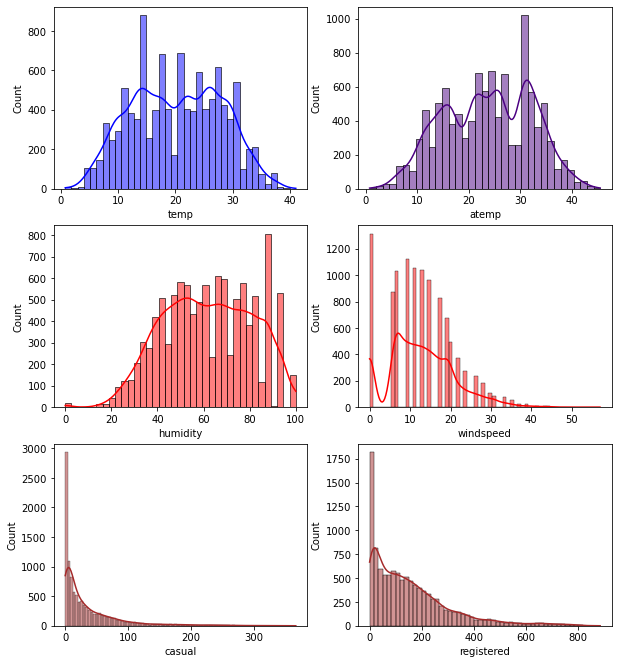

In [16]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=data, x="temp", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=data, x="atemp", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=data, x="humidity", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=data, x="windspeed", kde=True,color="red", ax=axis[1,1])
sns.histplot(data=data, x="casual", kde=True,color="brown", ax=axis[2,0])
sns.histplot(data=data, x="registered", kde=True,color="brown", ax=axis[2,1])
plt.show()

From the above observations we can say that :- 
- Most of the values in temprature lies in range of 10 - 40.
- Most of the values in atemp lies in range of 5 - 35.
- Most of the values in humidity percentage lies in 30 -100                 
- Most of the values in windspeed lies in range of 5 - 30.
- Most of the values in casual users lies in 0 - 100                   
- Most of the values in registered users lies in range of 0 - 400.


## No of holidays without saturdays and sundays

In [113]:
data.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<AxesSubplot:>

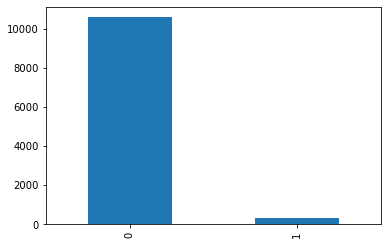

In [112]:
data.holiday.value_counts().plot(kind='bar')

- No.of holidays are only 311

## No of holidays and working days

In [115]:
data.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:>

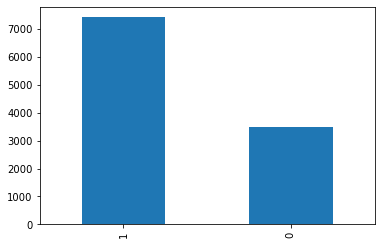

In [114]:
data.workingday.value_counts().plot(kind='bar')

From the above plot we can see that
- No.of holidays are almost half of working days

# Bivariate Analysis

## Dependance of weather on total user count

In [17]:
x1=data.groupby('weather')['count'].sum().reset_index()
x1

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


In [18]:
y1=data.groupby('weather')['count'].mean().reset_index()
y1

,weather,count
0,1,205.236791
1,2,178.955540
2,3,118.846333
3,4,164.000000


<AxesSubplot:xlabel='weather', ylabel='count'>

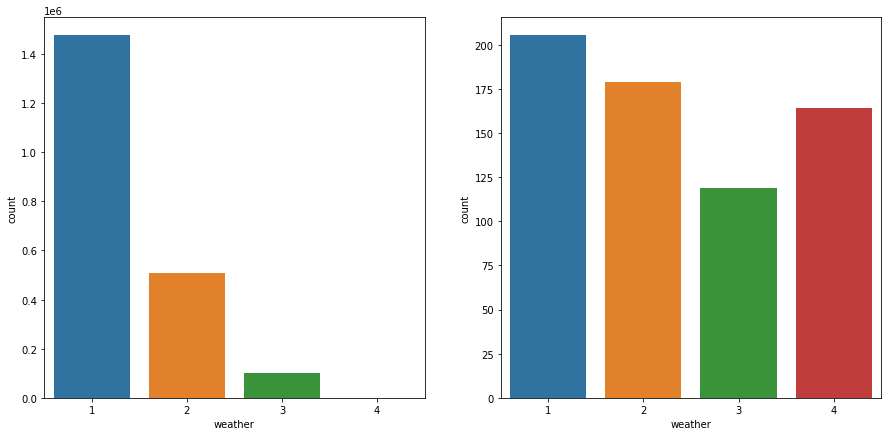

In [19]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='weather',y='count',data=x1)
plt.subplot(122)
sns.barplot(x='weather',y='count',data=y1)

- From the mean barplot we can see that Weather 1 is the most usage, and weather 3 is the least bike usage weathers 

## Dependance of season on total user count

In [92]:
x1=data.groupby('season')['count'].sum().reset_index()
x1

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


In [93]:
y1=data.groupby('season')['count'].mean().reset_index()
y1

,season,count
0,1,116.343261
1,2,215.251372
2,3,234.417124
3,4,198.988296


Text(0.5, 1.0, 'mean of users')

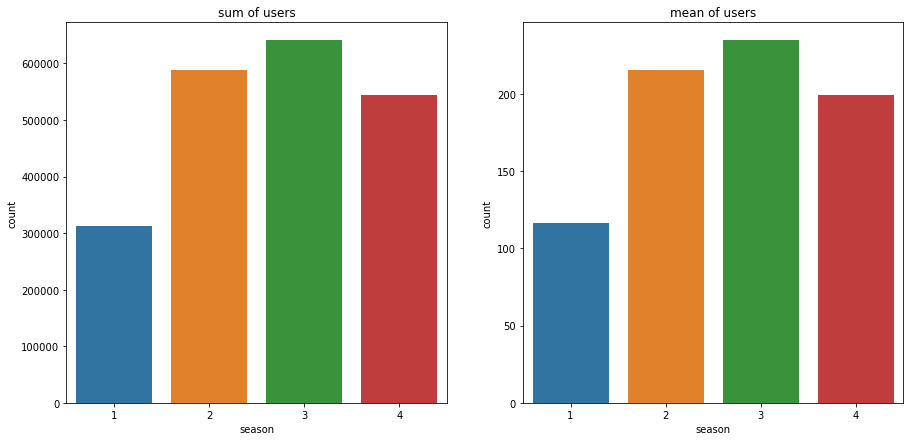

In [94]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='season',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.barplot(x='season',y='count',data=y1)
plt.title('mean of users')

- > 1: Clear, Few clouds, partly cloudy, partly cloudy
- > 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- > 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- > 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- No of users during season 2,3,4 is almost same, season 3 is the highest
- No of users during season 1 is the lowest

## Dependance of temp on total user count

In [87]:
x1=data.groupby('temp')['count'].sum().reset_index()
x1

,temp,count
0,0.82,544
1,1.64,183
2,2.46,215
3,3.28,212
4,4.10,2212
5,4.92,3505
6,5.74,5696
7,6.56,9944
8,7.38,7182
9,8.20,18777


In [88]:
y1=data.groupby('temp')['count'].mean().reset_index()
y1

,temp,count
0,0.82,77.714286
1,1.64,91.500000
2,2.46,43.000000
3,3.28,19.272727
4,4.10,50.272727
5,4.92,58.416667
6,5.74,53.233645
7,6.56,68.109589
8,7.38,67.754717
9,8.20,81.995633


Text(0.5, 1.0, 'mean of users')

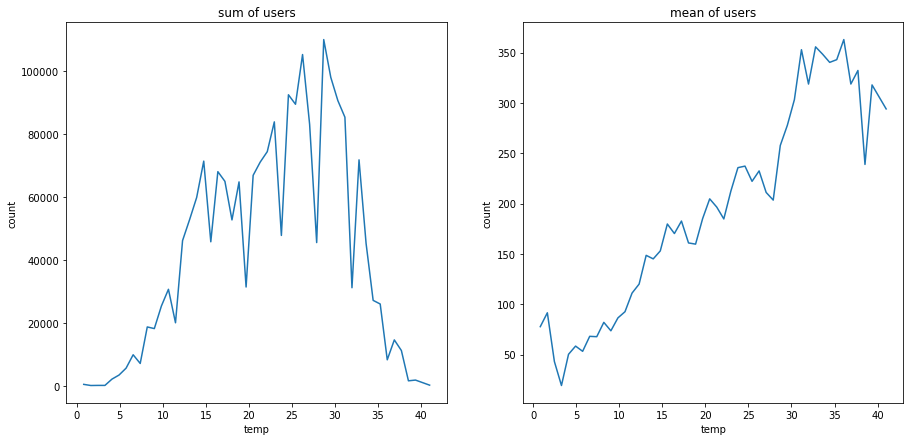

In [90]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='temp',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='temp',y='count',data=y1)
plt.title('mean of users')

- From the above plot we can see that at lower temprature no.of users are very low
- most of the users are in the temp range of 25 to 40 
- There is a gradual increse of no of users with increse in temprature

## Dependance of atemp on total user count

In [96]:
x1=data.groupby('atemp')['count'].sum().reset_index()
x1

,atemp,count
0,0.760,2
1,1.515,3
2,2.275,266
3,3.030,576
4,3.790,625
5,4.545,727
6,5.305,1580
7,6.060,4736
8,6.820,3552
9,7.575,4195


In [97]:
y1=data.groupby('atemp')['count'].mean().reset_index()
y1

,atemp,count
0,0.760,1.000000
1,1.515,3.000000
2,2.275,38.000000
3,3.030,82.285714
4,3.790,39.062500
5,4.545,66.090909
6,5.305,63.200000
7,6.060,64.876712
8,6.820,56.380952
9,7.575,55.933333


Text(0.5, 1.0, 'mean of users')

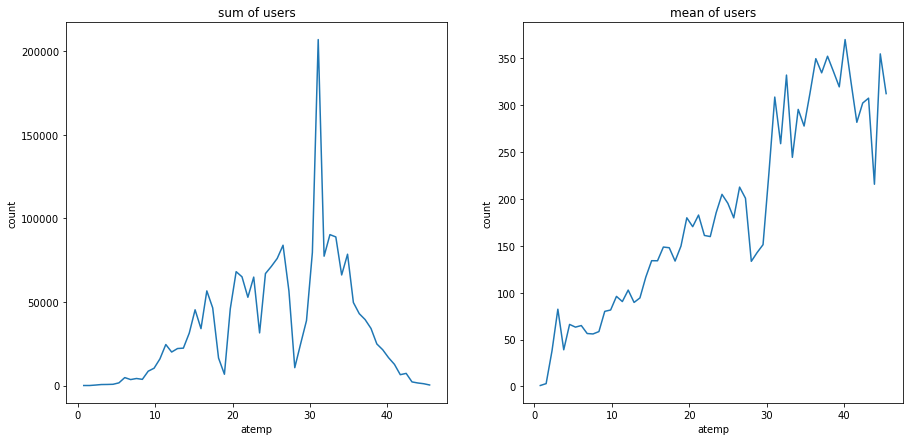

In [98]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='atemp',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='atemp',y='count',data=y1)
plt.title('mean of users')

- From the above plot we can see that at lower atemprature no.of users are very low
- most of the users are in the atemp range of 30 to 40
- There is a gradual increse of no of users with increse in temprature

## Dependance of humidity on total user count

In [99]:
x1=data.groupby('humidity')['count'].sum().reset_index()
x1

,humidity,count
0,0,623
1,8,77
2,10,107
3,12,29
4,13,17
...,...,...
84,93,14586
85,94,28666
86,96,71
87,97,64


In [100]:
y1=data.groupby('humidity')['count'].mean().reset_index()
y1

,humidity,count
0,0,28.318182
1,8,77.000000
2,10,107.000000
3,12,29.000000
4,13,17.000000
...,...,...
84,93,71.151220
85,94,88.475309
86,96,71.000000
87,97,64.000000


Text(0.5, 1.0, 'mean of users')

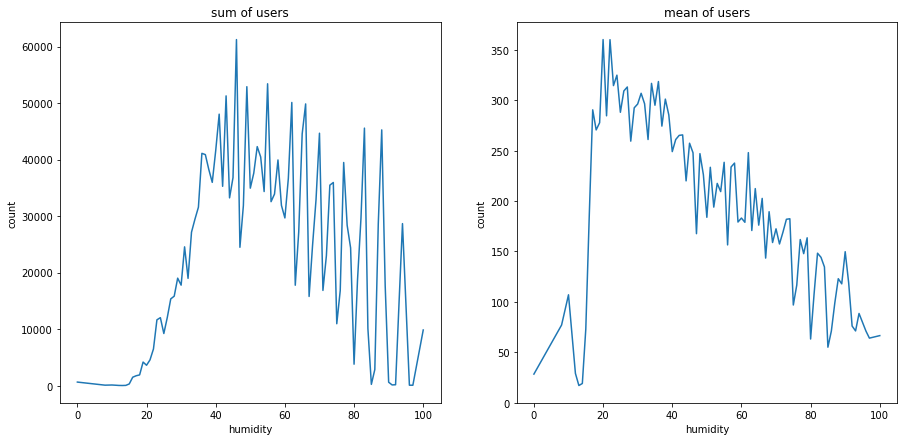

In [101]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='humidity',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='humidity',y='count',data=y1)
plt.title('mean of users')

- From the above plot we can see that at lower and higher humidity no.of users are very low
- most of the users are in the humidity range of 30 to 50
- Higher mean count of the users are in the humidity range of 20 to 40
- There is a gradual decrese of no of users with increse in humidity

## Dependance of windspeed on total user count

In [102]:
x1=data.groupby('windspeed')['count'].sum().reset_index()
x1

,windspeed,count
0,0.0000,211526
1,6.0032,128938
2,7.0015,175627
3,8.9981,196723
4,11.0014,213791
5,12.9980,210744
6,15.0013,202611
7,16.9979,177034
8,19.0012,147403
9,19.9995,110816


In [103]:
y1=data.groupby('windspeed')['count'].mean().reset_index()
y1

,windspeed,count
0,0.0000,161.101295
1,6.0032,147.864679
2,7.0015,169.852031
3,8.9981,175.645536
4,11.0014,202.262062
5,12.9980,202.249520
6,15.0013,210.833507
7,16.9979,214.847087
8,19.0012,218.051775
9,19.9995,225.235772


Text(0.5, 1.0, 'mean of users')

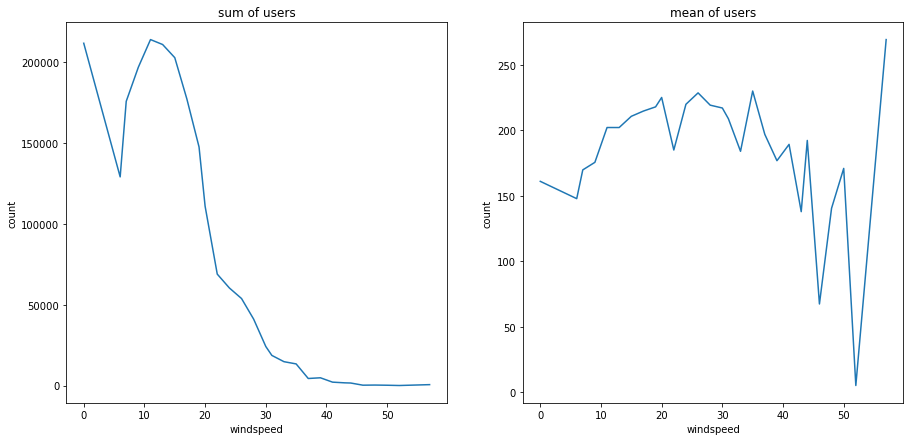

In [104]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='windspeed',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='windspeed',y='count',data=y1)
plt.title('mean of users')

- From the above plot we can see that at higher windspeed no.of users are very low
- most of the users are in the windspeed range of 0 to 25
- Mean count of the users are in the windspeed range of 0 to 40
- There is a uniform distribution of user count across all windspeed

## No of user counts in holidays without saturdays and sundays

In [119]:
data.groupby('holiday')['count'].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

<AxesSubplot:xlabel='holiday'>

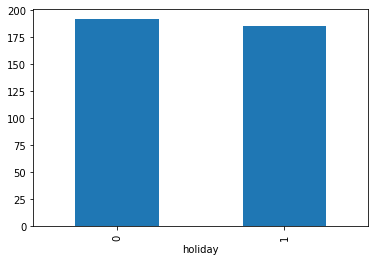

In [118]:
data.groupby('holiday')['count'].mean().plot(kind='bar')

- we can see that mean users are slightly less in holidays

## No of user counts in holidays and working days

In [120]:
data.groupby('workingday')['count'].mean()


workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

<AxesSubplot:xlabel='workingday'>

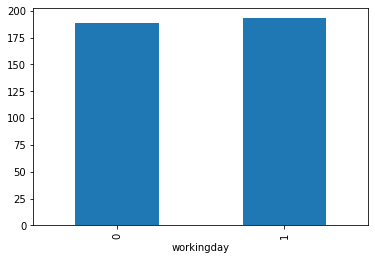

In [121]:
data.groupby('workingday')['count'].mean().plot(kind='bar')

- we can see that mean users are slightly higher in workingdays

## Adding new features like year,month,day,time from date time column

In [159]:
df=data.copy()

In [160]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day
df['day_name'] = df['datetime'].dt.day_name()
df['Time_hour'] = df['datetime'].dt.strftime('%H')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name,Time_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,1,Saturday,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,Saturday,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,1,Saturday,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,1,Saturday,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,1,Saturday,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,19,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,19,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,19,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,19,Wednesday,22


## No of user count in each weekdays 

In [55]:
x1=df.groupby('day_name')['count'].mean().to_frame('mean').reset_index()
x1

,day_name,mean
0,Friday,197.844343
1,Monday,190.390716
2,Saturday,196.665404
3,Sunday,180.839772
4,Thursday,197.296201
5,Tuesday,189.723847
6,Wednesday,188.411348


[]

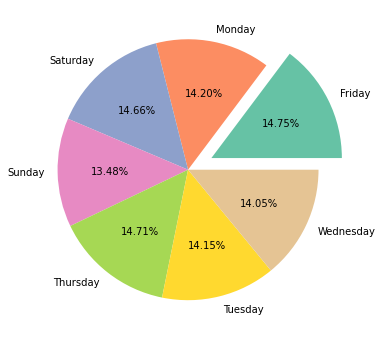

In [61]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=x1, x=x1['mean'], colors=palette_color, labels=x1['day_name'], explode=(0.2,0,0,0,0,0,0), autopct='%0.2f%%')
plt.plot()

- We can see that almost every day no.of users are same
- Most and leat mean users are in respective days are friday and sunday

## No of user count in each month

In [62]:
df.groupby('month')['count'].mean().to_frame('mean').reset_index()

,month,mean
0,April,184.160616
1,August,234.118421
2,December,175.614035
3,February,110.003330
4,January,90.366516
5,July,235.325658
6,June,242.031798
7,March,148.169811
8,May,219.459430
9,November,193.677278


<AxesSubplot:xlabel='month'>

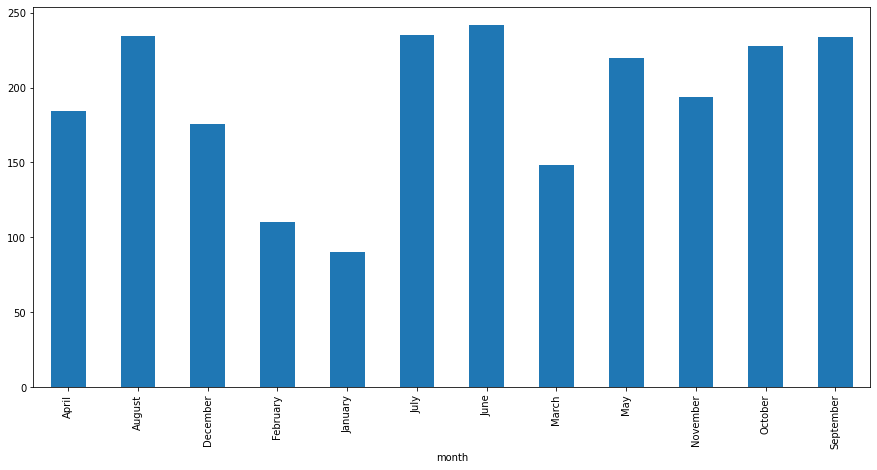

In [64]:
plt.figure(figsize=(15,7))
df.groupby('month')['count'].mean().plot(kind='bar')

From the above barplot we can se that
- june, july and august month are the most bike using months
- Januery february are the least

## Most demand time for rending bike

In [163]:
plt.figure(figsize=(15,7))
df.groupby('Time_hour')['count'].mean().reset_index()

,Time_hour,count
0,00,55.138462
1,01,33.859031
2,02,22.899554
3,03,11.757506
4,04,6.407240
5,05,19.767699
6,06,76.259341
7,07,213.116484
8,08,362.769231
9,09,221.780220


<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Time_hour'>

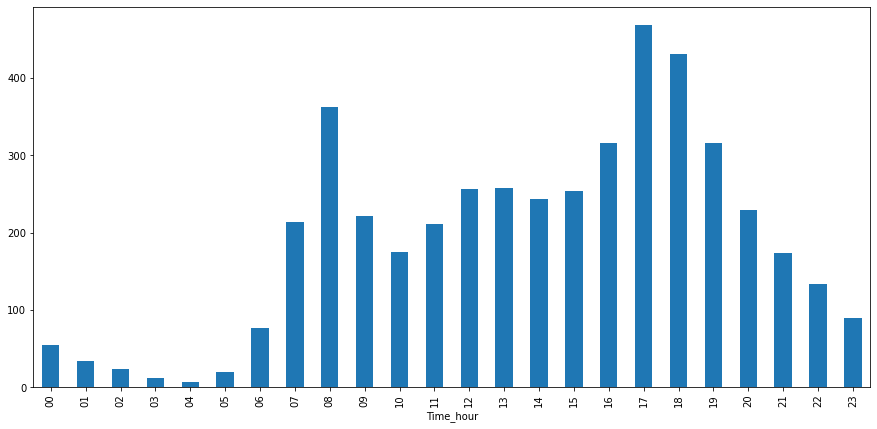

In [161]:
plt.figure(figsize=(15,7))
df.groupby('Time_hour')['count'].mean().plot(kind='bar')

- Most demanding time are morning 8-9 and evening 5-7

## Multivariate Analysis 

## No.of users across weather in working days

<AxesSubplot:xlabel='weather', ylabel='count'>

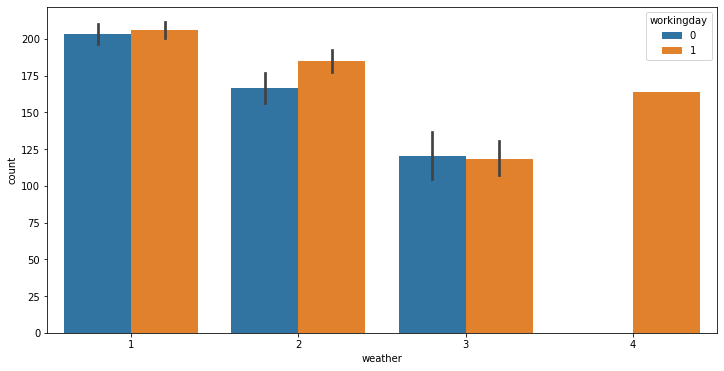

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y='count',x='weather',hue='workingday')

- In every weather conditions working days have most number of users

## No.of users across every season in working days

<AxesSubplot:xlabel='season', ylabel='count'>

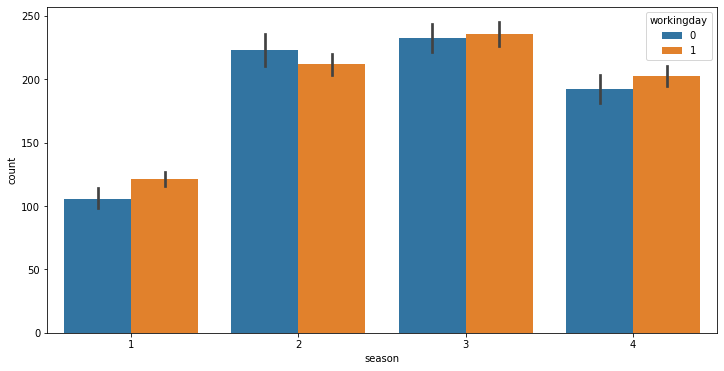

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y='count',x='season',hue='workingday')

- We can see that season 1,3,4 working days have most number of users
- In Season 2 holidays have most number of users

### Converting features like temp,atemp,humidity,windspeed to bins

In [74]:
df['temp_bin']=pd.cut(df['temp'],bins=[-1,10,20,30,45],labels=['low_temp','medium_temp','normal_temp','high_temp'])
df['atemp_bin']=pd.cut(df['atemp'],bins=[-1,10,20,30,46],labels=['low_atemp','medium_atemp','normal_atemp','high_atemp'])
df['humidity_bin']=pd.cut(df['humidity'],bins=[-1,25,50,75,101],labels=['humidity<25%','humidity<50%','humidity<75%','humidity<100%'])
df['windspeed_bin']=pd.cut(df['windspeed'],bins=[-1,15,30,45,60],labels=['low_windspeed','medium_windspeed','high_windspeed','very_high_windspeed'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name,temp_bin,atemp_bin,humidity_bin,windspeed_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,1,Saturday,low_temp,medium_atemp,humidity<100%,low_windspeed
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,Saturday,low_temp,medium_atemp,humidity<100%,low_windspeed
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,1,Saturday,low_temp,medium_atemp,humidity<100%,low_windspeed
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,1,Saturday,low_temp,medium_atemp,humidity<75%,low_windspeed
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,1,Saturday,low_temp,medium_atemp,humidity<75%,low_windspeed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<50%,medium_windspeed
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<75%,medium_windspeed
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<75%,medium_windspeed
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<75%,low_windspeed


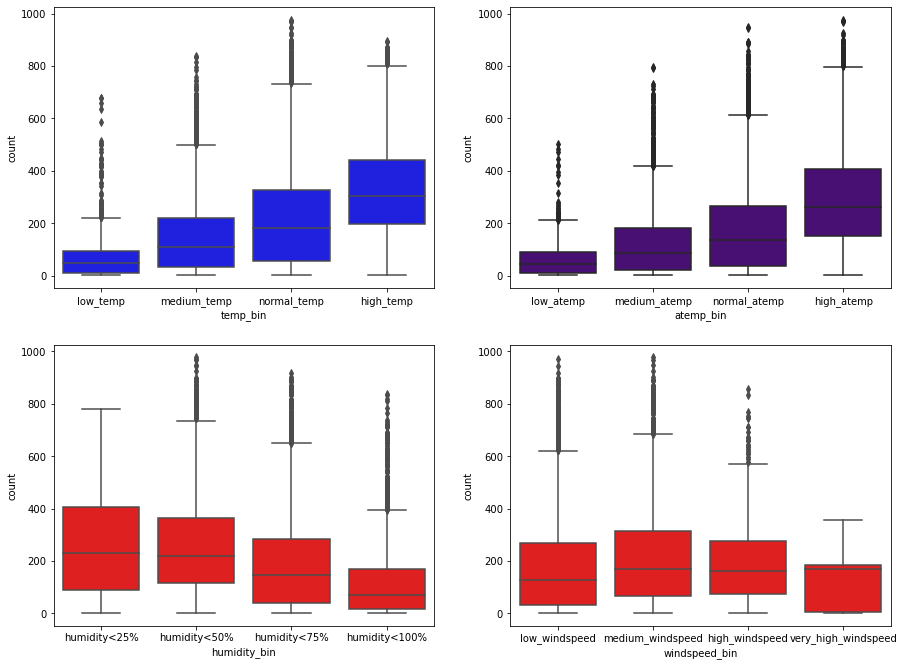

In [79]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=df, x="temp_bin",y='count',color="blue", ax=axis[0,0])
sns.boxplot(data=df, x="atemp_bin",y='count',color="indigo", ax=axis[0,1])
sns.boxplot(data=df, x="humidity_bin",y='count',color="red", ax=axis[1,0])
sns.boxplot(data=df, x="windspeed_bin",y='count',color="red", ax=axis[1,1])
plt.show()

## No.of users across every season in diffrent year

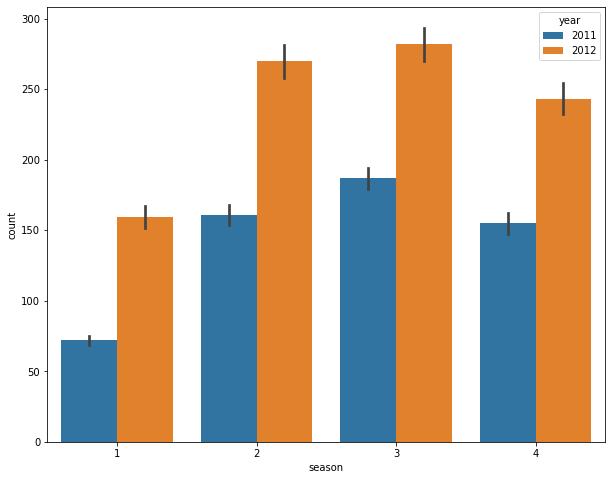

In [80]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='year',data=df)
plt.show()

- We can see that in every season with increse in year number of users are incresing 
- In season 1 almost double the users compare to previous year 

## No.of users across every season in casual and registered users

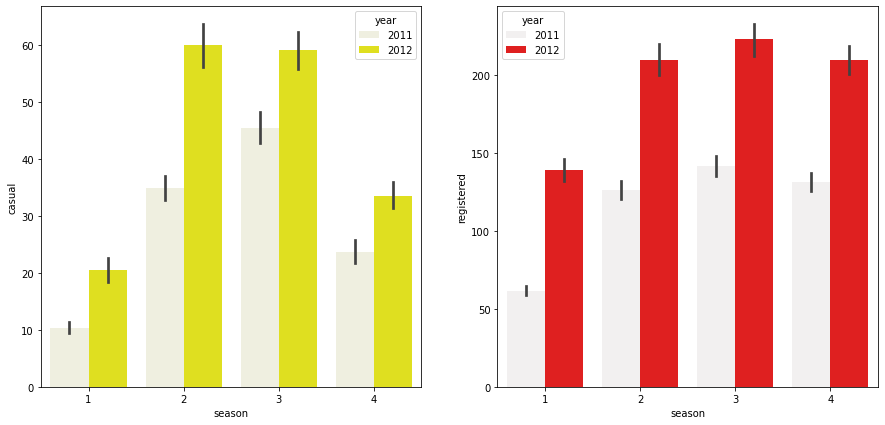

In [130]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='season',y='casual',hue='year',data=df,color='yellow')
plt.subplot(122)
sns.barplot(x='season',y='registered',hue='year',data=df,color='red')
plt.show()


- Both registerd and casual users are increse with increse in year in every seasons

## Temprature varies across diffrent month in each season

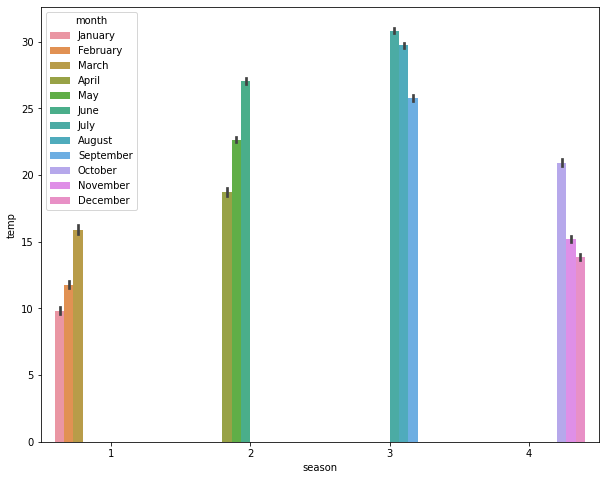

In [82]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='temp',hue='month',data=df)
plt.show()


- Season 3 is the highest  temprature seasons
> june
> july
> August
- season 1 is the lowest temprature seasons
> january
> february
> March

## No.of users varies across diffrent month in each season

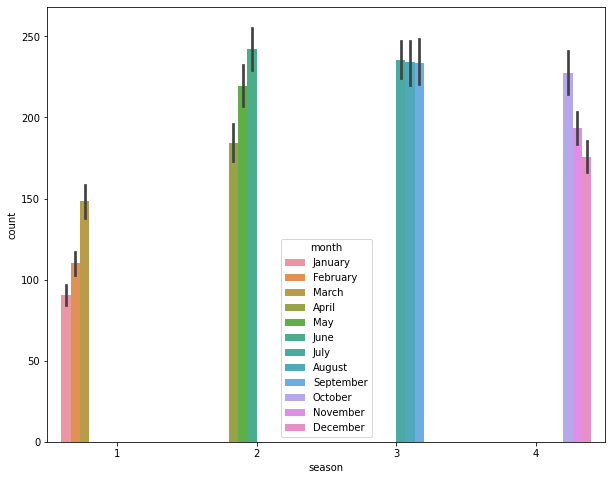

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='month',data=df)
plt.show()

- Season 2,3,4 is the highest bike user count seasons
- Season 1 is the lowest bike user count seasons
> january
> february
> March

## Usage of bikes in each season at diffrent times

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

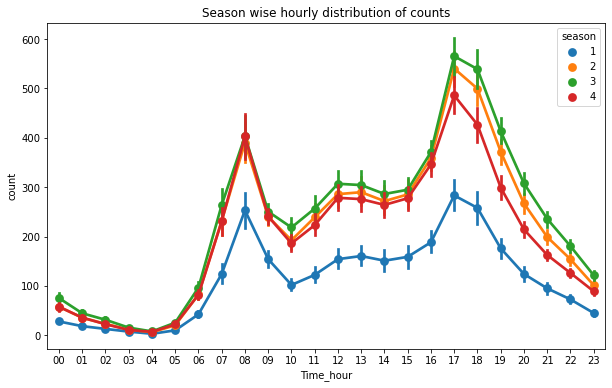

In [165]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.pointplot(data=df, x='Time_hour', y='count', hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

- Season 3 is the most bike usage month, we can see that in every season peaktime usage trend is almost same

## 2.3 Chi-square test to check if Weather is dependent on the season

Null hypothesisH0 ---->       :Weather is Independent on season                                                    
Alternative hypothesis H1---->:Weather is dependent on season

In [43]:

df_ws = pd.crosstab(df.weather,df.season,margins=True,margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
Total,2686,2733,2733,2734,10886


In [44]:
# Above weather 4 has less expected count so not include 4 
df_w=df[-(df['weather']==4)]
df_ws = pd.crosstab(df_w.weather,df_w.season,margins=True,margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
Total,2685,2733,2733,2734,10885


In [134]:
stat, p_value, dof, expected = stats.chi2_contingency(df_ws)
print('stat_value =',stat)
print('p_value =',p_value)
print('dof =',dof)
print('expected =',expected)


stat_value = 46.10145731073249
p_value = 6.664576536706683e-06
dof = 12
expected = [[ 1774.04869086  1805.76352779  1805.76352779  1806.42425356
   7192.        ]
 [  699.06201194   711.55920992   711.55920992   711.81956821
   2834.        ]
 [  211.8892972    215.67726229   215.67726229   215.75617823
    859.        ]
 [ 2685.          2733.          2733.          2734.
  10885.        ]]


In [46]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Weather is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Weather is dependent on season ')

We reject the Null Hypothesis : Weather is dependent on season 


#### We can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, Weather is dependent on season

## Chi-square test to check if Weather is workingday on the season

In [47]:
#H0 = workingday is Independent on season
#H1 = workingday is dependent on season
df_count_season = pd.crosstab(df.workingday,df.season,margins=True,margins_name='Total')
df_count_season

season,1,2,3,4,Total
workingday,,,,,
0,858,840,888,888,3474
1,1828,1893,1845,1846,7412
Total,2686,2733,2733,2734,10886


In [48]:
stat, p_value, dof, expected = stats.chi2_contingency(df_count_season)
stat, p_value, dof, expected


(2.5708953973429574,
 0.9583429307736173,
 8,
 array([[  857.17104538,   872.16994305,   872.16994305,   872.48906853,
          3474.        ],
        [ 1828.82895462,  1860.83005695,  1860.83005695,  1861.51093147,
          7412.        ],
        [ 2686.        ,  2733.        ,  2733.        ,  2734.        ,
         10886.        ]]))

In [49]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Workingday is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Workingday is dependent on season ')

We Accept the Null Hypothesis : Workingday is Independent on season  


#### We can see that p_value is greater than significant value(0.05) so we accept null hypothesis. So, Workingday is Independent on season 

## ANNOVA to check if No. of cycles rented is similar or different in different  season 

Null hypothesisH0 ---->       :count of bikes  is similar across various season                                                   
Alternative hypothesis H1---->:count of bikes is different across various season

In [143]:
season_1 = df[df['season']==1]['count']
season_2 = df[df['season']==2]['count']
season_3 = df[df['season']==3]['count']
season_4 = df[df['season']==4]['count']

In [144]:
staic_value,p_value = stats.f_oneway(season_1,season_2,season_3,season_4)
print("P-Value : ",p_value)
print("staic_value : ",staic_value)

P-Value :  6.164843386499654e-149
staic_value :  236.94671081032106


In [145]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes  is similar across various season ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various season ')

We reject the Null Hypothesis : count of bikes is different across various season 


#### We can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, count of bikes is different across various season 

## ANNOVA to check if No. of cycles rented is similar or different in different  weather  

Null hypothesisH0 ---->       :count of bikes  is similar across various weather                                                    
Alternative hypothesis H1---->:count of bikes is different across various weather 

In [146]:
weather_1 = df[df['weather']==1]['count']
weather_2 = df[df['weather']==2]['count']
weather_3 = df[df['weather']==3]['count']
weather_4 = df[df['weather']==4]['count']

In [147]:
staic_value,p_value = stats.f_oneway(weather_1,weather_2,weather_3,weather_4)
print("P-Value : ",p_value)
print("staic_value : ",staic_value)

P-Value :  5.482069475935669e-42
staic_value :  65.53024112793271


In [148]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes  is similar across various weather ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various weather ')

We reject the Null Hypothesis : count of bikes is different across various weather 


#### We can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, count of bikes is different across various weather 

# Insights
- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.


# Recommendations
- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.

In [3]:
!pip install autoviz

  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=e3de541ebf5fda1f074aa0b70b0e4f4ac84d34804622e3df9168503bee188957
  Stored in directory: c:\users\i am guest\appdata\local\pip\cache\wheels\9a\b8\0f\f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
  Attempting uninstall: setuptools
    Found existing installation: setuptools 61.2.0
    Uninstalling setuptools-61.2.0:
      Successfully uninstalled setuptools-61.2.0
  Attempting uninstall: panel
    Found existing installation: panel 0.13.0
    Uninstalling panel-0.13.0:
      Successfully uninstalled panel-0.13.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


In [6]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

ModuleNotFoundError: No module named 'channels'